# CS5228-KDDM, 2025/26-2, Coursework 1

### Introduction
In this section, we explore partitional clustering using the K-Means algorithm on a 2D toy dataset (a1-kmeans-toy-data.csv). The K-Means algorithm aims to partition data into $k$ distinct clusters by minimizing the variance within each cluster. However, its performance and convergence are highly sensitive to the initial placement of the cluster centroids.The primary objective of this task is to visually and analytically compare two initialization strategies: Standard Random Initialization and K-Means++ Initialization. By generating clustering results for varying numbers of clusters ($k = 2, 3$, and $4$) and constraining the algorithm to a single initialization attempt (n_init=1), we can expose the vulnerabilities of purely random centroid placement. Ultimately, this exercise will demonstrate how the mathematically optimized centroid dispersion in K-Means++ leads to more stable and intuitive clustering outcomes.

#### Student Name: MA YUCHEN
#### Student Number: A0327384X

### CW1, Part 2: Clustering using Python (2 marks)
Dataset: a1-kmeans-toy-data.csv 
In the following, your task is to implement the K-Means clustering algorithm. You can and should explore relevant methods provided by numpy or sklearn. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def run_clustering_analysis(df):
    
    X = df.values 

    # Plot Style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Step 1: Scatter Plot for Original data (Plot 1)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7, edgecolors='k')
    plt.title('Plot 1: Original Toy Data (Unclustered)', fontsize=14)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # K-values
    k_values = [2, 3, 4]
    
    # Fixed random_state 
    random_seed = 42

    # Step 2: K-Means with Random Initialization (Plots 2, 3, 4)
    print("\n--- K-Means with Random Initialization ---")
    plot_num = 2
    for k in k_values:
        # init='random' 
        kmeans_random = KMeans(n_clusters=k, init='random', n_init=1, random_state=random_seed)
        labels_random = kmeans_random.fit_predict(X)
        centroids_random = kmeans_random.cluster_centers_
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels_random, cmap='viridis', alpha=0.7, edgecolors='k')
        plt.scatter(centroids_random[:, 0], centroids_random[:, 1], 
                    c='red', marker='X', s=200, label='Centroids', edgecolors='white', linewidths=2)
        
        plt.title(f'Plot {plot_num}: Random Init K-Means ($k={k}$)', fontsize=14)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        plot_num += 1

    # Step 3: K-Means++ Initialization (Plots 5, 6, 7)
    print("\n--- K-Means++ Initialization ---")
    for k in k_values:
        # init='k-means++' 
        kmeans_plus = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=random_seed)
        labels_plus = kmeans_plus.fit_predict(X)
        centroids_plus = kmeans_plus.cluster_centers_
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels_plus, cmap='plasma', alpha=0.7, edgecolors='k')
        plt.scatter(centroids_plus[:, 0], centroids_plus[:, 1], 
                    c='red', marker='X', s=200, label='Centroids', edgecolors='white', linewidths=2)
        
        plt.title(f'Plot {plot_num}: K-Means++ Init ($k={k}$)', fontsize=14)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        plot_num += 1

In [3]:
df = pd.read_csv('a1-kmeans-toy-data.csv', header=None, names=['F1', 'F2'])
print(f"Original data length: {len(df)}")

Original data length: 100


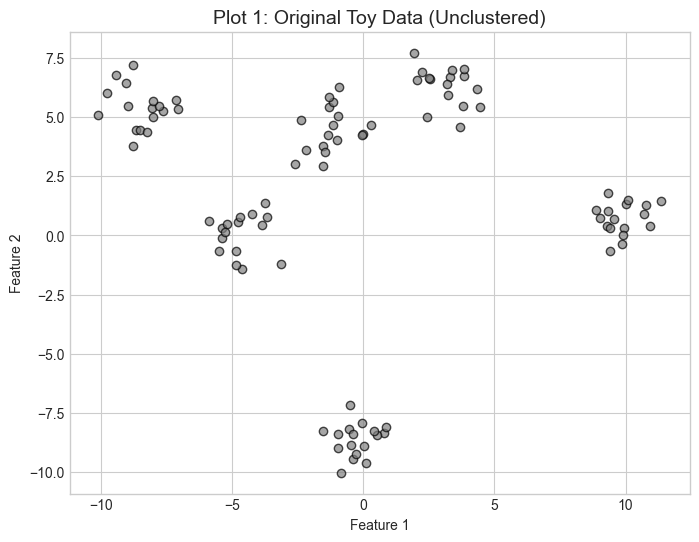


--- K-Means with Random Initialization ---


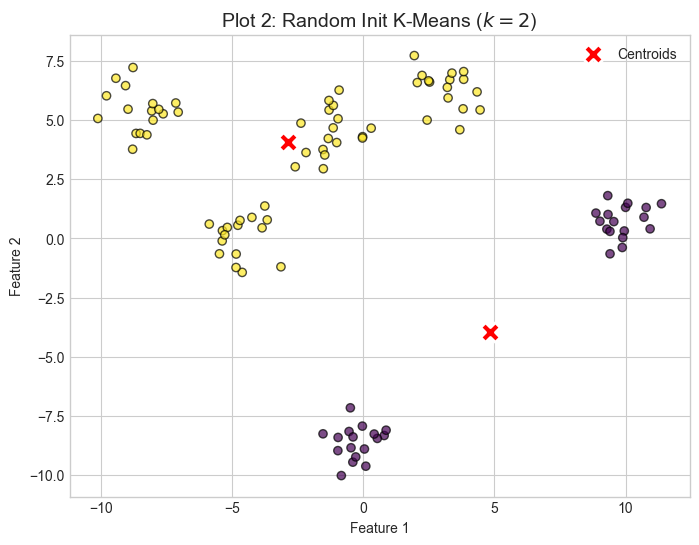

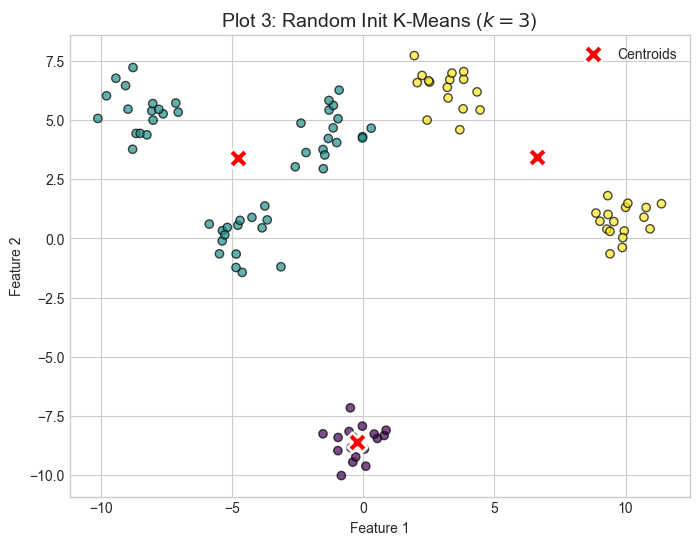

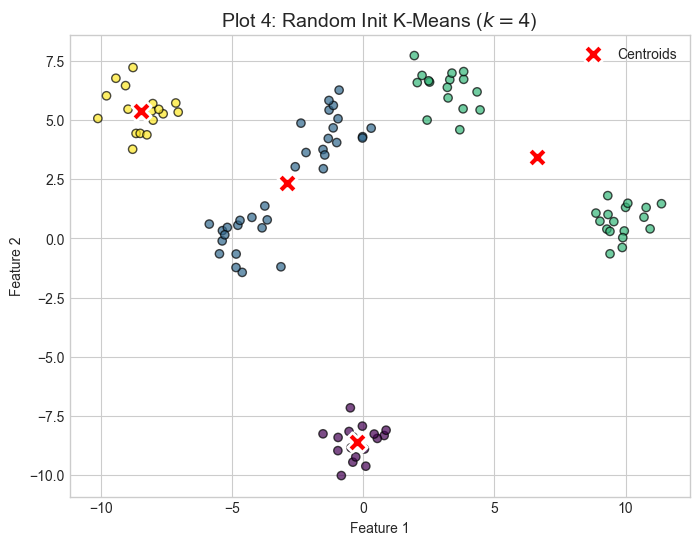


--- K-Means++ Initialization ---


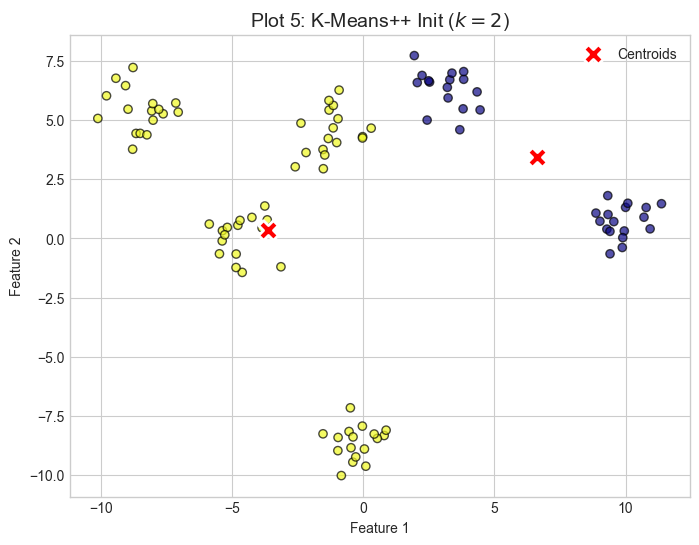

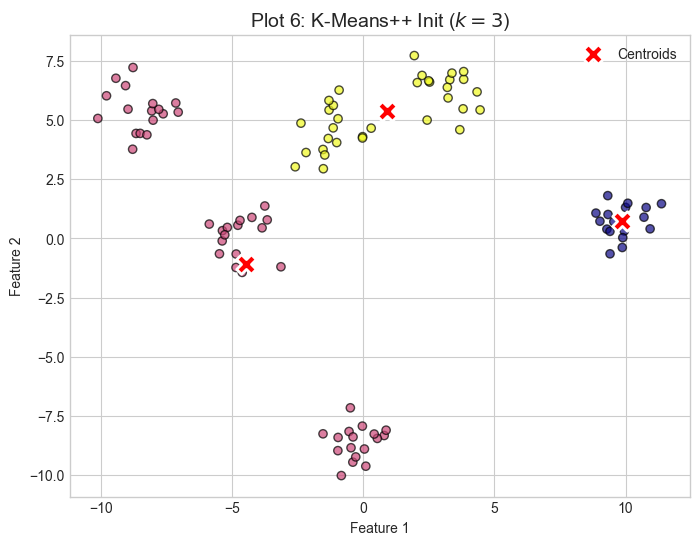

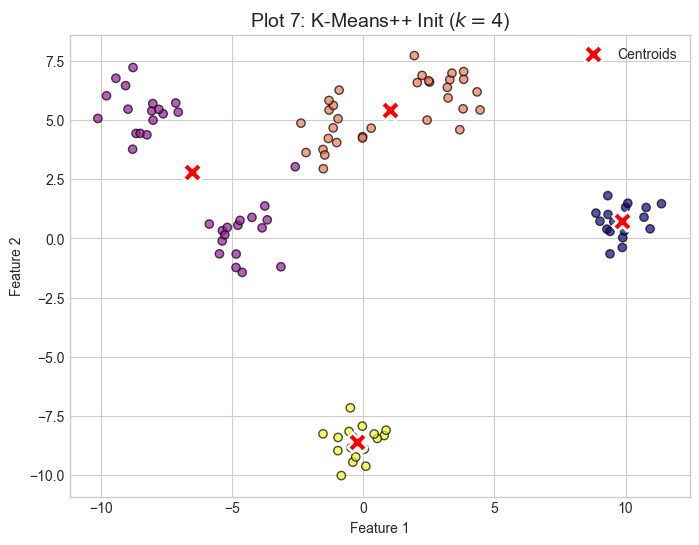

In [4]:
if __name__ == "__main__":
    run_clustering_analysis(df)

### Conclusion
Based on the visualization of the seven scatter plots, we can draw the following key conclusions regarding the behavior of the K-Means algorithm under different initialization conditions:
* The Baseline (Plot 1): The initial plot of the unclustered data reveals several natural, dense groupings within the 2D feature space. A successful clustering algorithm should ideally identify these intuitive boundaries.
* Vulnerability of Random Initialization (Plots 2, 3, and 4): The standard K-Means approach with random initialization struggles significantly, particularly as $k$ increases. Because the initial centroids are chosen entirely at random, they can sometimes be placed too close to one another or in sparse outlier regions. This leads to the algorithm converging on suboptimal "local minima." As seen in the random plots, this often results in unnatural boundaries where a single dense group of data is arbitrarily split, or two distinct groups are incorrectly merged into one cluster.
* Robustness of K-Means++ (Plots 5, 6, and 7): The K-Means++ algorithm fundamentally resolves this issue. By ensuring that the initial centroids are distributed as far away from each other as possible (using a probability proportional to the squared distance), K-Means++ avoids poor starting configurations. The resulting plots for K-Means++ demonstrate far more logical, compact, and distinct clusters that accurately reflect the natural distribution of the dataset.

Final Verdict: The visual evidence strongly supports the theory from Lecture 02: while standard K-Means is computationally straightforward, K-Means++ is a vastly superior and more robust choice for real-world clustering tasks, effectively mitigating the risk of poor centroid initialization.

### Why are there exactly 7 scatter plots?

According to the assignment instructions, the execution generates exactly 7 individual plots to systematically compare the initial unclustered data and the performance of two different initialization methods under varying numbers of clusters ($k$):
* Plot 1 (Step 2): This represents the original, unclustered 2D toy dataset. It serves as a visual baseline to understand the natural spatial distribution of the data before any algorithm is applied.

* Plots 2, 3, and 4 (Step 3): These three plots display the results of standard K-Means clustering for $k=2, 3$, and $4$, using Random Initialization (init='random'). Setting n_init=1 forces the algorithm to rely entirely on a single random guess for the initial centroids, which occasionally leads to suboptimal local minima (a known weakness discussed in Lecture 02).

* Plots 5, 6, and 7 (Step 4): The final three plots demonstrate the clustering results for $k=2, 3$, and $4$ using the advanced K-Means++ Initialization (init='k-means++'). By distributing the initial centroids intelligently based on squared distances, K-Means++ generally avoids poor starting positions and achieves better, more stable cluster formations.

This configuration ($1 \text{ baseline} + 3 \text{ random} + 3 \text{ K-means++} = 7 \text{ plots}$) provides a clear visual comparison of how the two algorithms behave as the target number of clusters increases.